In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
newBase = automap_base()

# reflect the tables
newBase.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
newBase.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = newBase.classes.measurement
Station = newBase.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precipt_info = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()
print(precipt_info)

[('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 0.0), ('2016-10-09', 

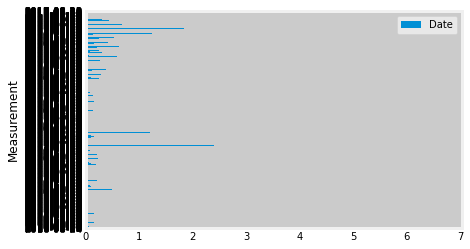

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# quick plot
rain_rain = pd.DataFrame(precipt_info, columns=['Measurement','Date'])
rain_rain.set_index('Measurement', inplace=True)
rain_rain.plot.barh()
plt.tight_layout
plt.show()

In [26]:
# Calculate the date one year from the last date in data set.
oneyearago_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(oneyearago_date)

2016-08-23


In [36]:
# Perform a query to retrieve the data and precipitation scores
lastyear_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= oneyearago_date).\
    filter(Measurement.date).all()
lastyear_precip[0]

('2016-08-23', 0.0)

In [39]:
# Save the query results as a Pandas DataFrame and set the index to the date column
lastyear_precip_df = pd.DataFrame(lastyear_precip)
lastyear_precip_df.set_index('date')
lastyear_precip_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [40]:
# Sort the dataframe by date
lastyear_precip_df = lastyear_precip_df.sort_index(ascending=True)
lastyear_precip_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

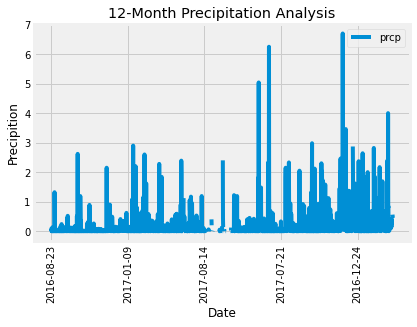

In [48]:
# Use Pandas Plotting with Matplotlib to plot the data
lastyear_precip_df.plot('date','prcp')
plt.title('12-Month Precipitation Analysis')
plt.xlabel('Date')
plt.ylabel('Precipition')
plt.xticks(rotation = 90)

In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lastyear_precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [50]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).count()
print(stations)

9


In [55]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_Stations = (session.query(Measurement.station, func.count(Measurement.station)).\
                   group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
print(active_Stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
